In [1]:
geno = read.csv("geno.csv", stringsAsFactors=F)
pheno = read.csv("pheno.csv", stringsAsFactors=F)

In [2]:
geno[1:5,]

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NA06984,...,NA12762,NA12763,NA12775,NA12776,NA12777,NA12778,NA12812,NA12814,NA12815,NA12827
22,16053659,rs915675,A,C,100,PASS,AC=4295;AF=0.857628;AN=5008;NS=2504;DP=14514;EAS_AF=0.9167;AMR_AF=0.8329;AFR_AF=0.8994;EUR_AF=0.7296;SAS_AF=0.8896;AA=.|||;VT=SNP,GT,1|0,...,0|0,0|1,1|1,1|1,1|0,1|0,1|1,1|0,1|0,0|1
22,16460869,rs200741211,C,T,100,PASS,AC=1003;AF=0.20028;AN=5008;NS=2504;DP=20254;EAS_AF=0.245;AMR_AF=0.1844;AFR_AF=0.0666;EUR_AF=0.3459;SAS_AF=0.1963;AA=c|||;VT=SNP,GT,1|0,...,0|0,1|1,0|0,0|0,0|0,0|1,0|1,1|1,0|1,0|0
22,16860967,rs28807214,A,G,100,PASS,AC=2024;AF=0.404153;AN=5008;NS=2504;DP=26503;EAS_AF=0.4077;AMR_AF=0.4971;AFR_AF=0.3865;EUR_AF=0.4095;SAS_AF=0.3528;AA=.|||;VT=SNP,GT,0|0,...,1|1,0|1,0|0,0|1,1|0,1|0,0|1,0|0,0|1,1|0
22,17264565,rs5748622,G,T,100,PASS,AC=3246;AF=0.648163;AN=5008;NS=2504;DP=3046;EAS_AF=0.369;AMR_AF=0.562;AFR_AF=0.7859;EUR_AF=0.5915;SAS_AF=0.8691;AA=.|||;VT=SNP;EX_TARGET,GT,1|0,...,1|0,0|0,0|1,1|1,0|1,1|1,1|0,0|0,0|0,1|1
22,17667426,rs5994193,C,T,100,PASS,AC=3125;AF=0.624002;AN=5008;NS=2504;DP=16888;EAS_AF=0.7768;AMR_AF=0.7666;AFR_AF=0.5144;EUR_AF=0.6342;SAS_AF=0.5031;AA=C|||;VT=SNP,GT,0|1,...,1|1,1|1,0|1,1|1,0|1,1|1,1|1,0|1,1|1,0|1


In [6]:
pheno[1:5,]

,ï..trait,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,NA06984,...,NA12762,NA12763,NA12775,NA12776,NA12777,NA12778,NA12812,NA12814,NA12815,NA12827
1,trait1,NA,NA,NA,NA,NA,NA,NA,NA,29.39642,...,27.68933,9.903998,30.627380,30.294710,31.088220,28.38192,29.74280,8.459469,8.519417,29.718970
2,trait2,NA,NA,NA,NA,NA,NA,NA,NA,29.55007,...,29.29348,20.662940,18.816950,21.725220,20.626230,28.18871,20.30039,29.988760,29.640890,30.266120
3,trait3,NA,NA,NA,NA,NA,NA,NA,NA,10.11668,...,10.29358,10.271100,6.756086,9.684814,9.352309,10.76807,10.40913,11.719640,9.863073,9.966832
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 1 0 1 1 1 1 0 2 2 1 0 2 0 1 2 1 2 2 1 1 2 1 2 2 2 0 2 1 2 1 2 1 2 2 1 2 1 2
[39] 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 2 1 1 1 2 2 1 1 1 2 2 2 0 1 2 2 1
[77] 1 2 1 1 1

Df1          Df2      Sum Sq1      Sum Sq2     Mean Sq1     Mean Sq2 
   2.0000000   78.0000000   22.9006354 6525.1149848   11.4503177   83.6553203 
    F value1     F value2      Pr(>F)1      Pr(>F)2 
   0.1368749           NA    0.8722883           NA

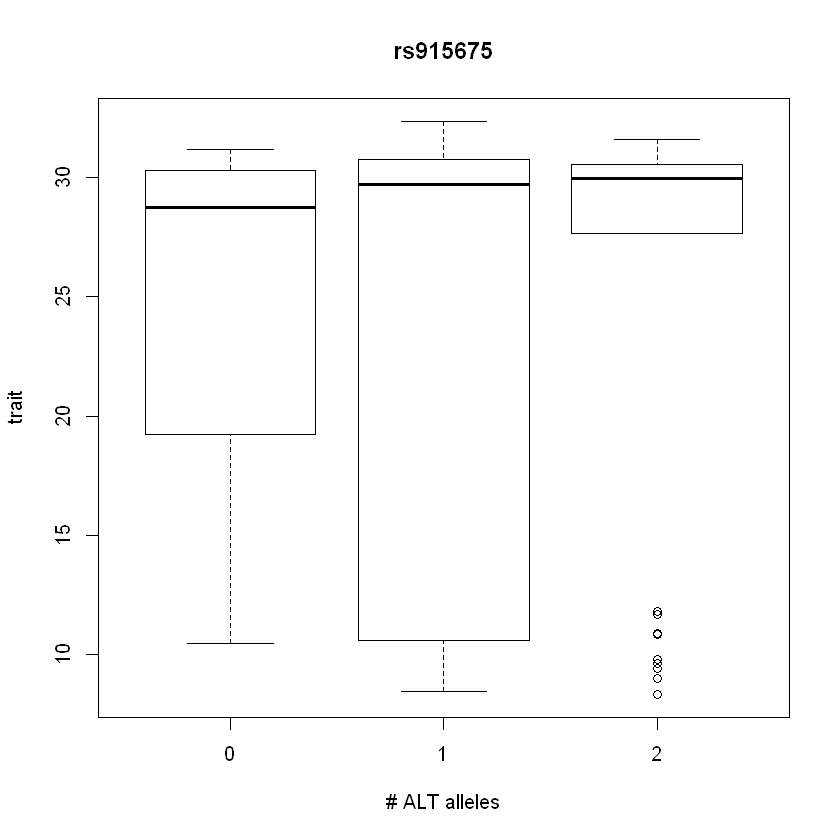

In [25]:
n = length(geno[1,])
snpid = geno[1,3]
genorow = geno[1,10:n]
phenorow = as.numeric(pheno[1,10:n])
#genorow
#phenorow

numalt = integer(length(genorow))
numalt[genorow == "0|0"] = 0
numalt[genorow == "1|0"] = 1
numalt[genorow == "0|1"] = 1
numalt[genorow == "1|1"] = 2
numalt

boxplot(phenorow~numalt, xlab="# ALT alleles", ylab="trait", main=snpid)
lmfit = lm(phenorow~as.factor(numalt))
a = anova(lmfit)

unlist(a)

In [78]:
testone <- function(geno1, pheno1, isShow){
     n = length(geno1)
     snpid = geno1[3]
     genorow = geno1[10:n]
     phenorow = as.numeric(pheno1[10:n])

    numalt = integer(length(genorow))
    numalt[genorow == "0|0"] = 0
    numalt[genorow == "1|0"] = 1
    numalt[genorow == "0|1"] = 1
    numalt[genorow == "1|1"] = 2

    lmfit = lm(phenorow~as.factor(numalt))
    temp = anova(lmfit)
    pv = unlist(temp)["Pr(>F)1"]
    
    if(isShow==TRUE){
        boxplot(phenorow~numalt, xlab="# ALT alleles", ylab="trait", main=snpid)
    }    
    pv
}

testall <- function(geno, pheno1){

    rawp = apply(geno, 1, testone, pheno1, FALSE)
    adjp = p.adjust(rawp, method="fdr")
    
    list(rawp=rawp, adjp=adjp)
}

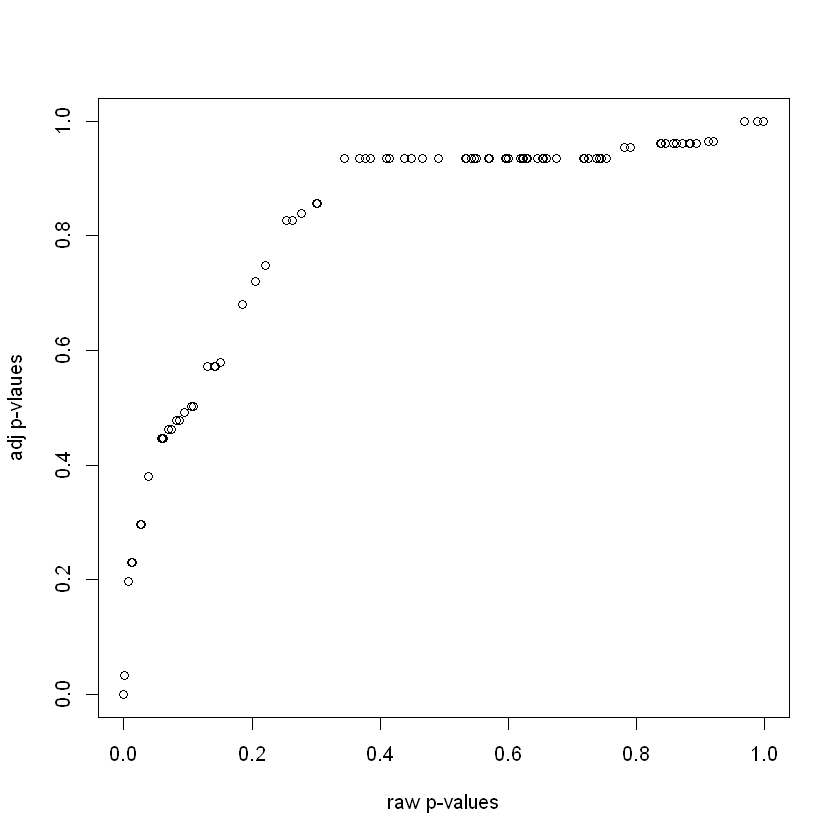

In [79]:
z <- testall(geno, pheno[1,])
plot(z$rawp, z$adjp, xlab="raw p-values", ylab="adj p-vlaues")


[1] 4

Pr(>F)1 
6.588857e-78

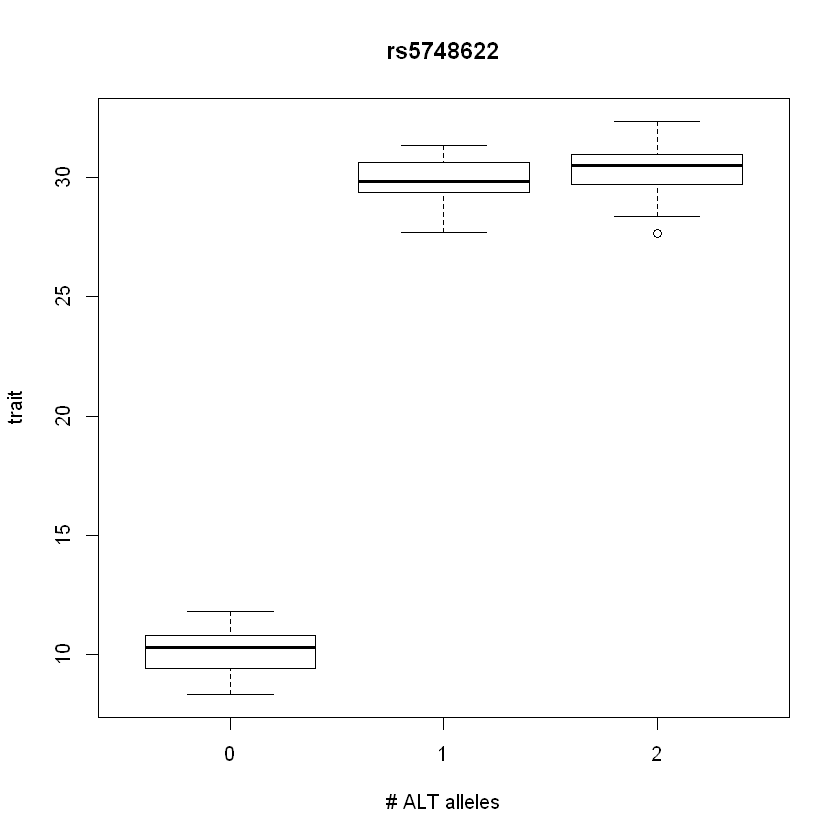

In [75]:
which(z$adjp<0.01)
testone(geno[4,], pheno[1,], TRUE)